## Rodrigo Schulz

# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

filename_features = "C:\\Users\\Rod\\Documents\\Data Science\\Python\\Ebac\\mod27\\Dados\\UCI HAR Dataset\\features.txt"
filename_labels = "C:\\Users\\Rod\\Documents\\Data Science\\Python\\Ebac\\mod27\\Dados\\UCI HAR Dataset\\activity_labels.txt"

filename_subtrain = "C:\\Users\\Rod\\Documents\\Data Science\\Python\\Ebac\\mod27\\Dados\\UCI HAR Dataset\\train\\subject_train.txt"
filename_xtrain = "C:\\Users\\Rod\\Documents\\Data Science\\Python\\Ebac\\mod27\\Dados\\UCI HAR Dataset\\train\\X_train.txt"
filename_ytrain = "C:\\Users\\Rod\\Documents\\Data Science\\Python\\Ebac\\mod27\\Dados\\UCI HAR Dataset\\train\\y_train.txt"

filename_subtest = "C:\\Users\\Rod\\Documents\\Data Science\\Python\\Ebac\\mod27\\Dados\\UCI HAR Dataset\\test\\subject_test.txt"
ffilename_xtest = "C:\\Users\\Rod\\Documents\\Data Science\\Python\\Ebac\\mod27\\Dados\\UCI HAR Dataset\\test\\X_test.txt"
filename_ytest = "C:\\Users\\Rod\\Documents\\Data Science\\Python\\Ebac\\mod27\\Dados\\UCI HAR Dataset\\test\\y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\Rod\AppData\Local\Temp\ipykernel_6408\2179760223.py:25: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\Rod\AppData\Local\Temp\ipykernel_6408\2179760223.py:28: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
C:\Users\Rod\AppData\Local\Temp\ipykernel_6408\2179760223.py:32: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [6]:
import time
# Criando o modelo da Árvore de Decisão com ccp_alpha=0.001
modelo_arvore = DecisionTreeClassifier(ccp_alpha=0.001)

# Treinando o modelo
inicio_treinamento = time.time()
modelo_arvore.fit(X_train, y_train)
fim_treinamento = time.time()

# Avaliando a acurácia nos conjuntos de treinamento e teste
y_train_pred = modelo_arvore.predict(X_train)
acuracia_train = accuracy_score(y_train, y_train_pred)

y_test_pred = modelo_arvore.predict(X_test)
acuracia_test = accuracy_score(y_test, y_test_pred)

# Calculando o tempo de processamento
tempo_treinamento = fim_treinamento - inicio_treinamento

print(f'Acurácia no conjunto de treinamento: {acuracia_train:.4f}')
print(f'Acurácia no conjunto de teste: {acuracia_test:.4f}')
print(f'Tempo de processamento: {tempo_treinamento:.4f} segundos')

Acurácia no conjunto de treinamento: 0.9764
Acurácia no conjunto de teste: 0.8660
Tempo de processamento: 2.6956 segundos


In [27]:
%%time

clf = DecisionTreeClassifier(random_state=1234).fit(X_train, y_train)
caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

CPU times: total: 3min 57s
Wall time: 3min 58s


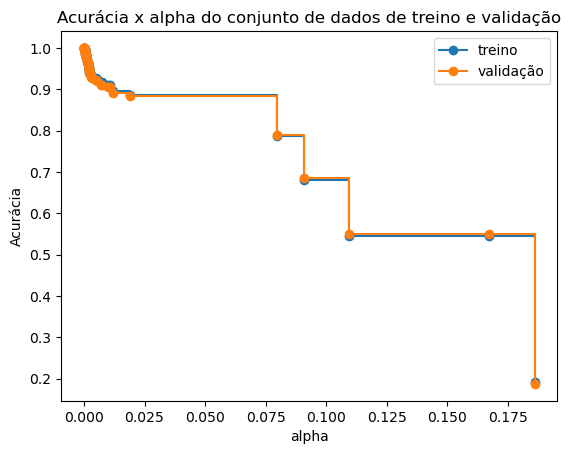

In [35]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="validação", drawstyle="steps-post")
ax.legend()
plt.show()

In [36]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

acc_train = train_scores[ind_melhor_arvore]
acc_valid = valid_scores[ind_melhor_arvore]
acc_teste = melhor_arvore.score(X_test, y_test)

print(f'Acurácia da melhor árvore na base de treino:    {acc_train*100:.1f}')
print(f'Acurácia da melhor árvore na base de validação: {acc_teste*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {acc_teste*100:.1f}')

Acurácia da melhor árvore na base de treino:    100.0
Acurácia da melhor árvore na base de validação: 85.5
Acurácia da melhor árvore na base de teste:     85.5


## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [28]:
%%time
# Aplicando PCA com uma componente principal
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Criando o modelo da Árvore de Decisão
modelo_arvore_pca = DecisionTreeClassifier()

# Treinando o modelo com a componente principal
inicio_treinamento = time.time()
modelo_arvore_pca.fit(X_train_pca, y_train)
fim_treinamento = time.time()

# Avaliando a acurácia nos conjuntos de treinamento e teste
y_train_pred = modelo_arvore_pca.predict(X_train_pca)
acuracia_train = accuracy_score(y_train, y_train_pred)

y_test_pred = modelo_arvore_pca.predict(X_test_pca)
acuracia_test = accuracy_score(y_test, y_test_pred)

# Calculando o tempo de processamento
tempo_treinamento = fim_treinamento - inicio_treinamento

print(f'Acurácia no conjunto de treinamento: {acuracia_train:.4f}')
print(f'Acurácia no conjunto de teste: {acuracia_test:.4f}')
print(f'Tempo de processamento: {tempo_treinamento:.4f} segundos')

Acurácia no conjunto de treinamento: 1.0000
Acurácia no conjunto de teste: 0.4102
Tempo de processamento: 0.0180 segundos
CPU times: total: 1.45 s
Wall time: 262 ms


In [43]:
%%time
prcomp = PCA(n_components=1).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_valida = prcomp.transform(X_valid)
pc_teste  = prcomp.transform(X_test)

pc_treino.shape

CPU times: total: 859 ms
Wall time: 128 ms


(7352, 1)

## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


In [45]:
%%time
# Lista das quantidades de componentes a serem testadas
quantidades_componentes = [1, 2, 5, 10, 50]

for n_components in quantidades_componentes:
    # Aplicando PCA com a quantidade de componentes atual
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Criando o modelo da Árvore de Decisão
    modelo_arvore_pca = DecisionTreeClassifier()

    # Treinando o modelo com a componente principal
    inicio_treinamento = time.time()
    modelo_arvore_pca.fit(X_train_pca, y_train)
    fim_treinamento = time.time()

    # Avaliando a acurácia nos conjuntos de treinamento e teste
    y_train_pred = modelo_arvore_pca.predict(X_train_pca)
    acuracia_train = accuracy_score(y_train, y_train_pred)

    y_test_pred = modelo_arvore_pca.predict(X_test_pca)
    acuracia_test = accuracy_score(y_test, y_test_pred)

    # Calculando o tempo de processamento
    tempo_treinamento = fim_treinamento - inicio_treinamento

    print(f'Quantidade de componentes: {n_components}')
    print(f'Acurácia no conjunto de treinamento: {acuracia_train:.4f}')
    print(f'Acurácia no conjunto de teste: {acuracia_test:.4f}')
    print(f'Tempo de processamento: {tempo_treinamento:.4f} segundos')
    print('-' * 40)

Quantidade de componentes: 1
Acurácia no conjunto de treinamento: 1.0000
Acurácia no conjunto de teste: 0.4102
Tempo de processamento: 0.0220 segundos
----------------------------------------
Quantidade de componentes: 2
Acurácia no conjunto de treinamento: 1.0000
Acurácia no conjunto de teste: 0.5165
Tempo de processamento: 0.0210 segundos
----------------------------------------
Quantidade de componentes: 5
Acurácia no conjunto de treinamento: 1.0000
Acurácia no conjunto de teste: 0.7438
Tempo de processamento: 0.0351 segundos
----------------------------------------
Quantidade de componentes: 10
Acurácia no conjunto de treinamento: 1.0000
Acurácia no conjunto de teste: 0.7971
Tempo de processamento: 0.0800 segundos
----------------------------------------
Quantidade de componentes: 50
Acurácia no conjunto de treinamento: 1.0000
Acurácia no conjunto de teste: 0.8029
Tempo de processamento: 0.4151 segundos
----------------------------------------
CPU times: total: 7.84 s
Wall time: 1.

## Conclusão

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

Os resultados de acurácia e tempo de processamento podem variar dependendo dos dados específicos que você está usando e das características do conjunto de dados. No entanto, vou explicar o que normalmente se espera ao ajustar o número de componentes principais e como isso pode afetar os resultados.

Acurácia:

Com uma única componente principal (n_components=1), a acurácia pode ser relativamente baixa, pois uma única componente não captura a complexidade dos dados.
À medida que você aumenta o número de componentes, a acurácia pode aumentar porque mais informações relevantes estão sendo incorporadas ao modelo.
No entanto, após um certo ponto, adicionar mais componentes pode levar ao overfitting, onde o modelo se ajusta demais aos dados de treinamento e não generaliza bem para novos dados de teste. Isso pode levar a uma queda na acurácia no conjunto de teste.
Tempo de Processamento:

Com uma única componente principal, o tempo de processamento deve ser relativamente baixo, pois a redução de dimensionalidade é mínima.
À medida que você aumenta o número de componentes, o tempo de processamento pode aumentar, pois o PCA precisa realizar mais cálculos para projetar os dados nas novas dimensões.
No entanto, em muitos casos, o aumento no tempo de processamento não é linear com o número de componentes, especialmente se o algoritmo utilizado para o PCA for eficiente em termos de tempo.
Portanto, ao testar diferentes quantidades de componentes principais, você provavelmente observará um trade-off entre acurácia e tempo de processamento. A acurácia pode aumentar à medida que você adiciona mais componentes, mas depois pode diminuir devido ao overfitting. O tempo de processamento pode aumentar à medida que o número de componentes aumenta.

É importante encontrar um equilíbrio entre acurácia e eficiência computacional, considerando as características do seu conjunto de dados e os requisitos do problema que você está abordando. Isso pode ser feito por meio de técnicas como validação cruzada para selecionar o número ideal de componentes principais.